In [ ]:
import numpy as np
import numpy.random as nrand
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [2]:
Y_MIN = -0.6931471805599453
Y_MAX = 0.942657031435126
BASES = np.asarray(['A','C','G'])

In [3]:
def load_sequence(sequences):
    shape = sequences.shape
    data = sequences[..., None] == BASES
    return data.reshape(shape[0], shape[1] * BASES.size)

def tolog(y,Y_MIN,Y_MAX):
    y = np.log(y)
    y = y - Y_MIN
    y = y/Y_MAX
    return y

In [4]:
with open("../5_tRNA_Extrapolation/All_data_df.pkl",'rb') as f:
    data = pickle.load(f)

In [5]:
data_filtered = data[np.sum(data[['FitS1','FitS2','FitS3','FitS4','FitS5','FitS6']] == 0.5,axis=1) == 0]
data_tolog = tolog(data_filtered[['FitS1','FitS2','FitS3','FitS4','FitS5','FitS6']],Y_MIN,Y_MAX)
data_tolog['FitMean'] = data_tolog.mean(axis=1)
data_tolog['std'] = data_tolog.std(axis=1)

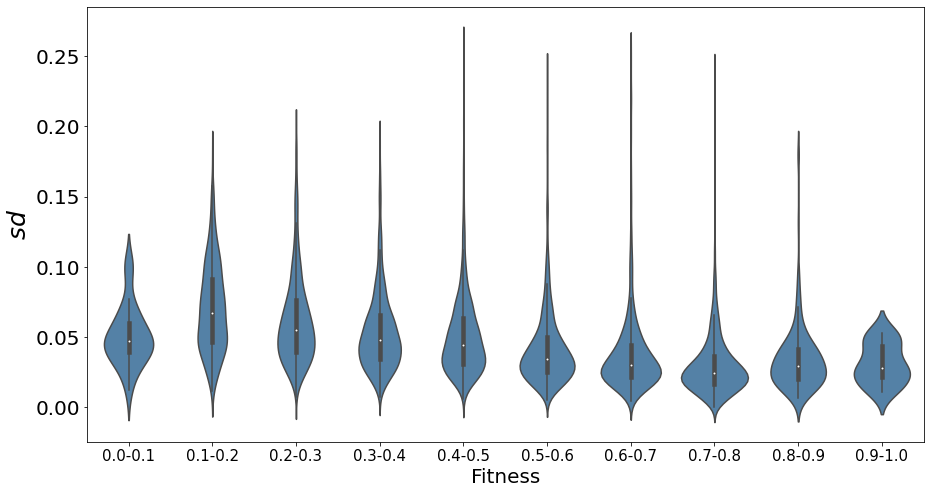

In [6]:
fig,ax = plt.subplots(figsize=[15,8])
y_list = []
x_list = []
for i in range(10):
    std_list = data_tolog[(data_tolog['FitMean']<(i+1)*0.1) & (data_tolog['FitMean']>=i*0.1)]['std']
    y_list += list(std_list)
    x_list += [f'{i*0.1:.3}-{i*0.1+0.1:.3}']*len(std_list)

sns.violinplot(x=x_list , y=y_list, color='steelblue',ax=ax)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
ax.set_xlabel('Fitness',fontsize=20)
ax.set_ylabel('$sd$',fontsize=25)
plt.show()